# ML_Playground 2

In [2]:
## General Import
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sys



/tmp/ipykernel_486416/3330568686.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
### Local Import
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC

2024-02-17 02:56:29.718909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [5]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure'])

## 1.Wind 

In [ ]:
## Wind Speed

## 2. Cloud

In [10]:
#test using Time Series Forest Classifier
! pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 KB 11.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0


In [23]:
from sktime.datasets import load_arrow_head
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.regression.interval_based import TimeSeriesForestRegressor
from sktime.forecasting.base import ForecastingHorizon

In [17]:
from sktime.transformations.panel.segment import RandomIntervalSegmenter

In [24]:
from sklearn.metrics import mean_absolute_error

In [30]:
#sample data
from sktime.datasets import load_italy_power_demand

# load an example time series panel in pd-multiindex mtype
X_sample, _ = load_italy_power_demand(return_type="pd-multiindex")

# renaming columns for illustrative purposes
X_sample.columns = ["total_power_demand"]
X_sample.index.names = ["day_ID", "hour_of_day"]

In [34]:
X_sample

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:344: FutureWarning: MultiIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


total_power_demand
day_ID hour_of_day                    
0      0                     -0.710518
       1                     -1.183320
       2                     -1.372442
       3                     -1.593083
       4                     -1.467002
...                                ...
1095   19                     0.180490
       20                    -0.094058
       21                     0.729587
       22                     0.210995
       23                    -0.002542

[26304 rows x 1 columns]

In [41]:
X = pd.DataFrame(small_cloud_layer)

# renaming columns for illustrative purposes
X.columns = ["n_cloud_layer"]
X.index = raw_METAR_data['hour'][:2000]
X.index.names = ["hour"]

In [7]:
cloud_layers = raw_METAR_data['n_cloud_layers']

In [22]:
small_cloud_layer = cloud_layers[:2000]

In [25]:
# Create lagged features
def create_lagged_features(series, n_lags):
    df = pd.DataFrame(series, columns=['y'])
    # Create lagged features
    for n in range(1, n_lags + 1):
        df[f'lag_{n}'] = df['y'].shift(n)
    df = df.dropna().reset_index(drop=True)  # Drop rows with NaN values created by shifting
    return df



In [43]:
n_lags = 6
series = small_cloud_layer
df = create_lagged_features(X, n_lags)
X = df.drop('y', axis=1)
y = df['y']

In [45]:
y

Series([], Name: y, dtype: float64)

In [27]:
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [29]:
X.shape

(1994, 6)

In [47]:
# The Dimensions will be : 
# Wind Degree
# Wind Speed
# Visibility
# Cloud
# Temperature
# Dew
# Air Pressure
# 

In [54]:
import matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [55]:
# settings for plotting
# Figure properties\
tick_width = 2
tick_length = 8
matplotlib.rcParams['axes.linewidth'] = 2.5
matplotlib.rcParams['savefig.transparent'] = False
matplotlib.rcParams['figure.autolayout'] = False
matplotlib.rcParams['figure.constrained_layout.use'] = False
matplotlib.rcParams['axes.unicode_minus'] = False # using small minus sign (i.e. hypen-minus) and not the default unicode minus
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams["axes.linewidth"] = 2.0
matplotlib.rcParams["axes.labelsize"] = 20
matplotlib.rcParams['savefig.dpi'] = 300

In [57]:
plt.xticks?

Signature:
plt.xticks(
    ticks: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    *,
    minor: 'bool' = False,
    **kwargs,
) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
minor : bool, default: False
    If ``False``, get/set the major ticks/labels; if ``True``, the minor
    ticks/labels.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of xtick locations.
labels
    The list of xlabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``x

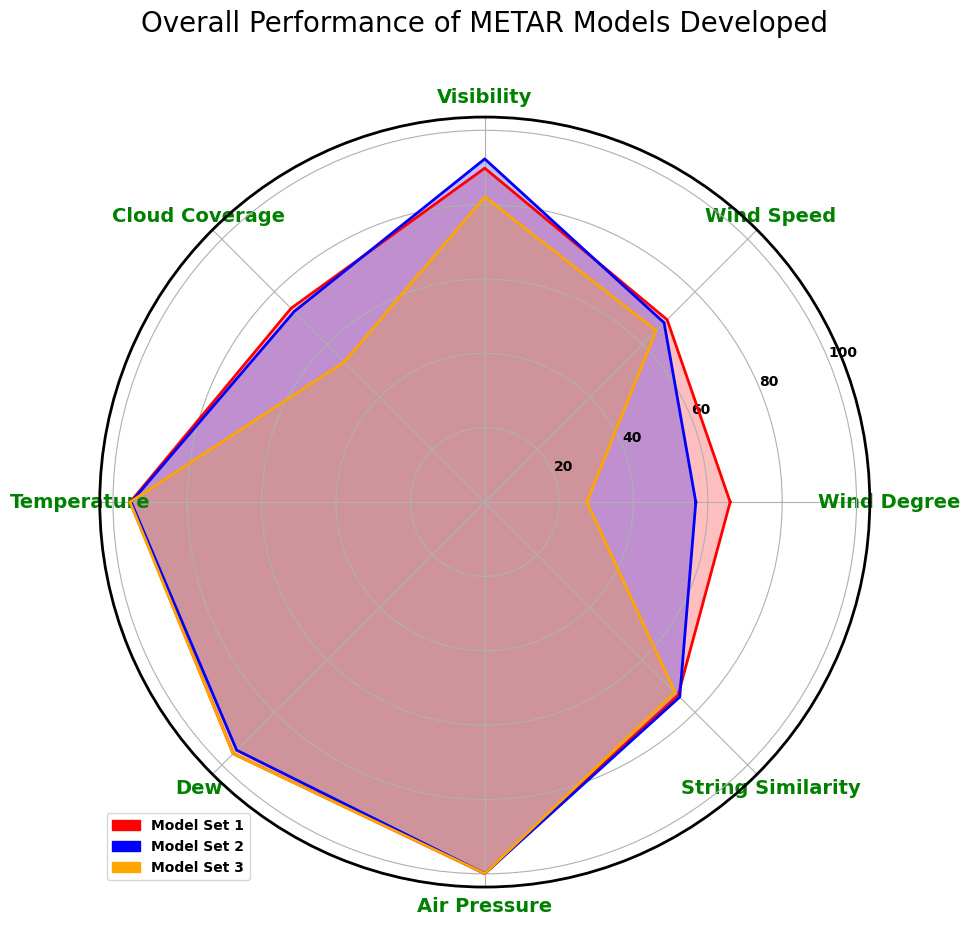

In [66]:

# Number of dimensions
num_vars = 8

# Example data: test results for two models across 6 dimensions
values_model1 = [66.01617126, 69.37298061,  89.82222222, 73.68947646, 95.35746096,
       95.71314093, 99.93707207, 73.51735685]  # Model 1
values_model2 = [56.77227775, 68.22052158, 92.30714286, 72.48428112, 95.10615987,
       94.37645512, 99.9202859 , 74.16957395] # Model 2
values_model3 = [27.4700287,  65.2286200,  82.1134921, 53.3672059,
        95.4229044,  95.7193668,  99.9223016,  72.3585341]  # Model 2
values = [values_model1, values_model2, values_model3]

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
values_model1 += values_model1[:1]
values_model2 += values_model2[:1]
values_model3 += values_model3[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))



# Plot data
ax.plot(angles, values_model1, color='red', linewidth=2, linestyle='solid')
ax.fill(angles, values_model1, color='red', alpha=0.25)

ax.plot(angles, values_model2, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, values_model2, color='blue', alpha=0.25)

ax.plot(angles, values_model3, color='orange', linewidth=2, linestyle='solid')
ax.fill(angles, values_model3, color='orange', alpha=0.25)

# Add a title
plt.title('Overall Performance of METAR Models Developed', size=20, color='black', y=1.1)
# Draw one axe per variable and add labels
plt.xticks(angles[:-1], ['Wind Degree', 'Wind Speed', 'Visibility',
                         'Cloud Coverage', 'Temperature', 'Dew', 
                         'Air Pressure', 'String Similarity'],color ='green',fontsize=14)

# Add a legend
red_patch = mpatches.Patch(color='red', label='Model Set 1')
blue_patch = mpatches.Patch(color='blue', label='Model Set 2')
orange_patch = mpatches.Patch(color='orange', label='Model Set 3')
plt.legend(handles=[red_patch, blue_patch,orange_patch], loc='lower left')

plt.show()
fig.savefig('../results/Model_Benchmark.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')